In [6]:
import pickle
import numpy as np
import os
import torch
import torch.nn as nn
import re
import sys
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from sr_model.models.models import AnalyticSR, STDP_SR
from datasets import inputs
import configs
from pylab import figure, cm
from matplotlib.colors import LogNorm

device = 'cpu'

In [101]:
def run_and_plot(
    exp_dir_or_net, figname, num_steps=2000, vmin=None, vmax=None,
    savetrace=False
    ):
    """
    Plots example M matrices for unbiased and forward-biased 1D walks.
    """
    
    num_states = 25
    
    figsize=(2.,1.25)

    # Test datasets
    dset = inputs.Sim1DWalk(num_steps=num_steps, num_states=num_states, left_right_stay_prob=[5,1,1])

    # Load model
    if type(exp_dir_or_net) is str:
        exp_dir = exp_dir_or_net
        with open(exp_dir + 'net_configs.p', 'rb') as f:
            net_configs = pickle.load(f)
        net_configs['num_states'] = num_states
        net = STDP_SR(**net_configs)
        state_dict = torch.load(exp_dir + 'model.pt')
        print(state_dict)
        net.load_state_dict(state_dict)
        net.set_num_states(num_states)
        print(net_configs)
    else:
        net = exp_dir_or_net
    
    # RNN Estimated M
    dg_inputs = torch.from_numpy(dset.dg_inputs.T).float().to(device).unsqueeze(1)
    with torch.no_grad():
        _, outputs = net(dg_inputs, reset=True)
        outputs = outputs.numpy()
    rnn_M = net.get_M()
    try:
        rnn_M = rnn_M.numpy()
    except:
        pass
    plt.figure(figsize=figsize)
    plt.imshow(rnn_M, vmax=vmax, vmin=vmin)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.tight_layout()
    plt.savefig(f'../figures/{figname}.png', dpi=300, transparent=True)
    plt.show()
        
    # Plot a few example traces
    fig, axs = plt.subplots(3, 1, figsize=(2.5,2.75))
    xlim = 901
    for idx in range(3):
        ax = axs[idx]
        trace = outputs[:xlim, np.random.choice(num_states)]
        ax.plot(trace)
        xtick_locs = np.arange(0, xlim, 180)
        ax.set_xticks(xtick_locs)
        ax.set_xticklabels(np.arange(xtick_locs.size))
        ax.set_ylabel(f'Neuron {idx+1}')
    plt.tight_layout()
    if savetrace:
        plt.savefig('../figures/S3f.png', dpi=300, transparent=True)
    plt.show()

# Linear Network

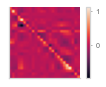

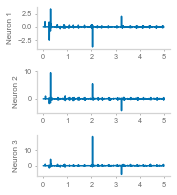

In [102]:
net = STDP_SR(25, 0.9)
run_and_plot(net, 'S3etop', savetrace=True)

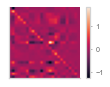

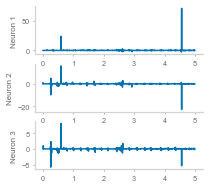

In [88]:
net = STDP_SR(25, 0.9)
run_and_plot(net, 'S3ebottom', savetrace=True)

# Truncated Rollout

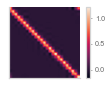

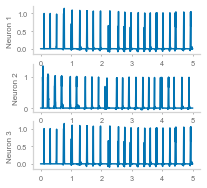

In [81]:
net = STDP_SR(25, 0.8, ca3_kwargs={
    'output_params':{'num_iterations': 2}
        })
run_and_plot(net, 'S3b', num_steps=1000)

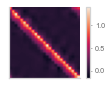

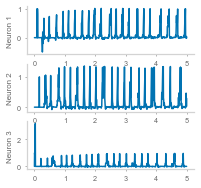

In [82]:
net = STDP_SR(25, 0.8, ca3_kwargs={
    'output_params':{'num_iterations': 4}
        })
run_and_plot(net, 'S3c', num_steps=1000)

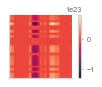

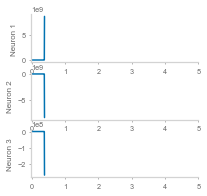

In [83]:
net = STDP_SR(25, 0.8, ca3_kwargs={
    'output_params':{'num_iterations': 5}
        })
run_and_plot(net, 'S3d1', num_steps=70)

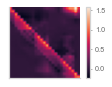

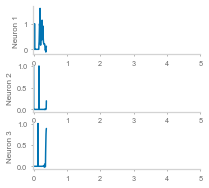

In [84]:
net = STDP_SR(25, 0.8, ca3_kwargs={
    'output_params':{'num_iterations': 5}
        })
run_and_plot(net, 'S3d2', num_steps=70)

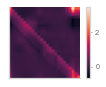

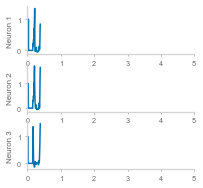

In [85]:
net = STDP_SR(25, 0.8, ca3_kwargs={
    'output_params':{'num_iterations': 5}
        })
run_and_plot(net, 'S3d3', num_steps=70)

/Users/chingfang/opt/anaconda3/envs/aronov/lib/python3.9/site-packages/matplotlib/image.py:479: RuntimeWarning: overflow encountered in subtract
  A_scaled -= a_min
/Users/chingfang/opt/anaconda3/envs/aronov/lib/python3.9/site-packages/matplotlib/image.py:480: RuntimeWarning: overflow encountered in subtract
  vrange -= a_min
/Users/chingfang/opt/anaconda3/envs/aronov/lib/python3.9/site-packages/matplotlib/colors.py:1202: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/Users/chingfang/opt/anaconda3/envs/aronov/lib/python3.9/site-packages/matplotlib/image.py:503: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / frac)


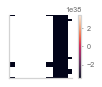

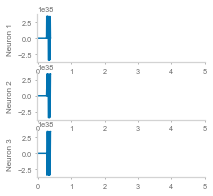

In [86]:
net = STDP_SR(25, 0.8, ca3_kwargs={
    'output_params':{'num_iterations': 5}
        })
run_and_plot(net, 'S3d4', num_steps=70)